In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


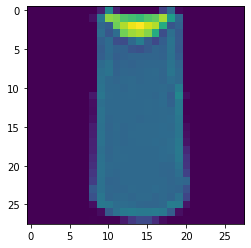

In [ ]:
plt.imshow(X_train[2])

In [ ]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=784,))
model.add(tf.keras.layers.Dense(units = 128,activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units = 64,activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units = 32,activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.200))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),loss='kullback_leibler_divergence',metrics=['accuracy'])
model_history = model.fit(X_train,y_train,batch_size=32,epochs=30,validation_data=(X_test,y_test),callbacks=[cb])
print("Total training time = " + str(sum(cb.logs)))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1621 - accuracy: 0.7972 - val_loss: 0.8035 - val_accuracy: 0.8348
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7177 - accuracy: 0.8537 - val_loss: 0.6602 - val_accuracy: 0.8474
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6069 - accuracy: 0.8681 - val_loss: 0.6202 - val_accuracy: 0.8519
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5511 - accuracy: 0.8758 - val_loss: 0.6115 - val_accuracy: 0.8507
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5161 - accuracy: 0.8814 - val_loss: 0.5544 - val_accuracy: 0.8578
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4841 - accuracy: 0.8875 - val_loss: 0.5465 - val_accuracy: 0.8602
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4632 - accuracy: 0.8938 - val_loss: 0.5557 - val_accuracy:

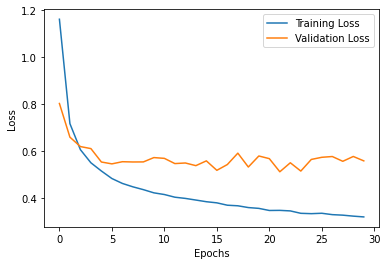

In [ ]:
plt.plot(model_history.history['loss'],label='Training Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

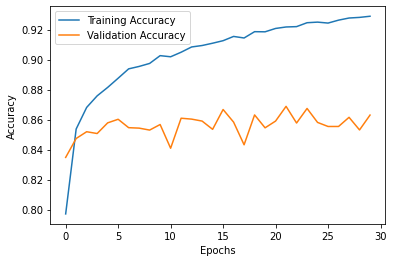

In [ ]:
plt.plot(model_history.history['accuracy'],label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()